In [12]:
#read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [146]:
df = pd.read_csv("/Users/rakeshravi/Documents/Spring/Text Analytics/Project/corpus.csv", sep = "|", nrows = 2000)

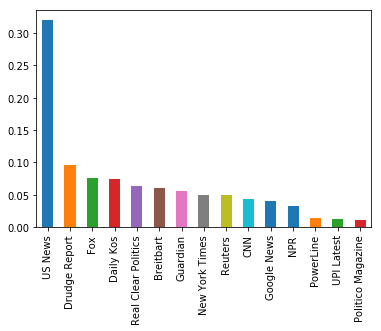

In [147]:
#what is distribution for sources
df.doc_source.value_counts(normalize = True).plot('bar')

In [152]:
#drop NaNs
df = df.dropna()
df.shape

(1838, 6)

In [154]:
# assigning labels of left leaning (L) and right leaning (R)
list_of_sources = ['US News', 'UPI Latest','Drudge Report','Fox',
'Google News',
'Real Clear Politics',
'CNN',
'NPR',
'New York Times',
'Reuters',
'Daily Kos',
'Guardian',
'PowerLine',
'Politico Magazine',
'Breitbart']

list_of_labels = ['left-center',
'center',
'right',
'right',
'left',
'right-center',
'left',
'left-center',
'left-center',
'center',
'left',
'left-center',
'right',
'center',
'right']

dictionary = dict(zip(list_of_sources, list_of_labels))
df['label']= df['doc_source'].map(dictionary)

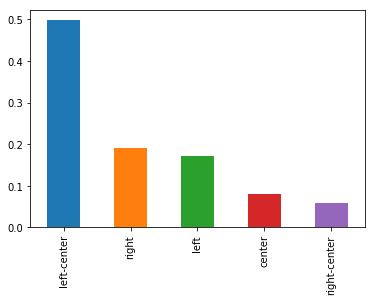

In [155]:
#distribution of different labels
df.label.value_counts(normalize = True).plot('bar')

In [157]:
#chcking for null values after labeling
df[df["label"].isnull()].shape

(0, 7)

In [134]:
df.label.value_counts()
df.groupby(["doc_source","label"]).size()

doc_source           label       
Breitbart            right           120
CNN                  left             88
Daily Kos            left            147
Drudge Report        right           192
Fox                  right            13
Google News          left             82
Guardian             left-center     113
NPR                  left-center      64
New York Times       left-center      99
Politico Magazine    center           21
PowerLine            right            28
Real Clear Politics  right-center    107
Reuters              center          100
UPI Latest           center           25
US News              left-center     639
dtype: int64

In [296]:
df = df.reindex(np.arange(df.index.min(), df.index.max() + 1))

In [158]:
#imporiting all libraries
# Run in python console
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakeshravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [256]:
# Convert to list
data = df.doc_content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[1837][0:2000])

('Professional athletes have a big platform and a growing number of them are '
 'using it to protest police violence. The Sunday after a grand jurys decision '
 'not to indict Ferguson police officer Darren Wilson in the killing of '
 'Michael Brown, five members of the St. Louis Rams went onto the field with '
 'their hands up. Now, following a different grand jurys decision not to '
 'indict New York City police officer Daniel Pantaleo in the killing of Eric '
 'Garner, those Rams have company in using their time on television to make a '
 'statement, with most focusing on Garners last words, "I cant breathe." Guard '
 'Davin Joseph wrote the words on the cleats he wore during pregame warmups '
 'before the Rams beat the Washington Redskins 24-0. Tight end Jared Cook had '
 'it written on his wrist tape. Receiver Kenny Britt had several names — '
 'including Michael Brown and Trayvon Martin — written on his blue and gold '
 'cleats. The names were of black men or teens whose deaths l

In [162]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['washington', 'post', 'years', 'on', 'finding', 'profit', 'in', 'truth', 'on', 'jfk', 'caseabc', 'newson', 'the', 'very', 'day', 'john', 'kennedy', 'died', 'cottage', 'industry', 'was', 'born', 'fifty', 'years', 'and', 'hundreds', 'of', 'millions', 'of', 'dollars', 'later', 'its', 'still', 'thriving', 'its', 'product', 'the', 'truth', 'about', 'the', 'presidents', 'assassination', 'by', 'the', 'evening', 'of', 'november', 'found', 'myself', 'being', 'years', 'after', 'jfk', 'dallas', 'sheds', 'shadow', 'of', 'com', 'years', 'later', 'tv', 're', 'examines', 'kennedy', 'assassination', 'theoriessalt', 'lake', 'tribune', 'decades', 'later', 'some', 'jfk', 'probe', 'files', 'still', 'sealedlex', 'lexington', 'ky', 'newsall', 'news', 'articles']]


In [163]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['washington_post', 'years', 'on', 'finding', 'profit', 'in', 'truth', 'on', 'jfk', 'caseabc', 'newson', 'the', 'very', 'day', 'john_kennedy', 'died', 'cottage', 'industry', 'was', 'born', 'fifty', 'years', 'and', 'hundreds', 'of', 'millions', 'of', 'dollars', 'later', 'its', 'still', 'thriving', 'its', 'product', 'the', 'truth', 'about', 'the', 'presidents', 'assassination', 'by', 'the', 'evening', 'of', 'november', 'found', 'myself', 'being', 'years', 'after', 'jfk', 'dallas', 'sheds', 'shadow', 'of', 'com', 'years', 'later', 'tv', 're', 'examines', 'kennedy', 'assassination', 'theoriessalt', 'lake', 'tribune', 'decades', 'later', 'some', 'jfk', 'probe', 'files', 'still', 'sealedlex', 'lexington', 'ky', 'newsall_news_articles']


In [164]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [165]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['washington_post', 'year', 'find', 'profit', 'truth', 'jfk', 'caseabc', 'newson', 'day', 'kennedy', 'die', 'cottage', 'industry', 'bear', 'year', 'hundred', 'million', 'dollar', 'later', 'still', 'thrive', 'product', 'truth', 'president', 'assassination', 'evening', 'november', 'find', 'year', 'jfk', 'dalla', 'shed', 'shadow', 'com', 'year', 'later', 'tv', 'examine', 'kennedy', 'assassination', 'theoriessalt', 'lake', 'tribune', 'decade', 'later', 'jfk', 'probe', 'file', 'still', 'sealedlex', 'lexington', 'ky', 'newsall_new', 'article']]


In [166]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 3), (18, 2), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 4)]]


In [167]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [168]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"say" + 0.010*"report" + 0.009*"cia" + 0.009*"senate" + '
  '0.006*"torture" + 0.005*"release" + 0.005*"program" + 0.005*"would" + '
  '0.004*"new" + 0.004*"continue_read"'),
 (1,
  '0.010*"not" + 0.009*"people" + 0.008*"say" + 0.007*"republican" + '
  '0.007*"get" + 0.006*"year" + 0.006*"go" + 0.006*"make" + 0.006*"do" + '
  '0.006*"would"'),
 (2,
  '0.019*"th_story" + 0.015*"link" + 0.014*"story" + 0.012*"second_column" + '
  '0.008*"link_related" + 0.007*"first_column" + 0.007*"china" + '
  '0.007*"player" + 0.006*"mexico" + 0.006*"edelman"'),
 (3,
  '0.011*"man" + 0.007*"police" + 0.006*"officer" + 0.006*"kill" + '
  '0.006*"black" + 0.006*"terrorist" + 0.006*"shirt" + 0.004*"crime" + '
  '0.004*"technique" + 0.004*"nypd"')]


In [169]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.570473601658167

Coherence Score:  0.35583421861272835


In [304]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.208529  0.102766       1        1  53.324677
0      0.158322 -0.118960       2        1  30.778269
3     -0.184626 -0.147948       3        1  10.651149
2     -0.182225  0.164142       4        1   5.245906, topic_info=      Category        Freq             Term       Total  loglift  logprob
term                                                                     
1122   Default  167.000000            story  167.000000  30.0000  30.0000
5908   Default  275.000000              cia  275.000000  29.0000  29.0000
692    Default  525.000000              not  525.000000  28.0000  28.0000
139    Default  268.000000           senate  268.000000  27.0000  27.0000
5332   Default   97.000000         th_story   97.000000  26.0000  26.0000
61     Default  457.000000           people  457.000000  25.0000  25.0000
175    Default  884.000000              say  884.000000  24.0000  24.0000
288    Default  147.000000              man  147.000000  23.0000  23.0000
1490   Default   79.000000             link   79.000000  22.0000  22.0000
480    Default  386.000000       republican  386.000000  21.0000  21.0000
523    Default  139.000000             back  139.000000  20.0000  20.0000
621    Default  404.000000           report  404.000000  19.0000  19.0000
124    Default  369.000000              get  369.000000  18.0000  18.0000
7464   Default  167.000000          torture  167.000000  17.0000  17.0000
2290   Default  112.000000           police  112.000000  16.0000  16.0000
5359   Default   62.000000    second_column   62.000000  15.0000  15.0000
684    Default  303.000000               do  303.000000  14.0000  14.0000
1576   Default   81.000000            black   81.000000  13.0000  13.0000
53     Default   93.000000             kill   93.000000  12.0000  12.0000
576    Default   89.000000          officer   89.000000  11.0000  11.0000
462    Default  257.000000         democrat  257.000000  10.0000  10.0000
10487  Default  126.000000    continue_read  126.000000   9.0000   9.0000
1425   Default  242.000000               be  242.000000   8.0000   8.0000
366    Default  192.000000          release  192.000000   7.0000   7.0000
420    Default  239.000000                s  239.000000   6.0000   6.0000
369    Default   61.000000        terrorist   61.000000   5.0000   5.0000
1159   Default  206.000000          program  206.000000   4.0000   4.0000
507    Default  220.000000        obamacare  220.000000   3.0000   3.0000
2915   Default   59.000000            shirt   59.000000   2.0000   2.0000
126    Default  212.000000             good  212.000000   1.0000   1.0000
...        ...         ...              ...         ...      ...      ...
1040    Topic4   13.971723         football   14.591894   2.9043  -5.9069
3677    Topic4   20.590521          mexican   21.545858   2.9024  -5.5191
5315    Topic4   11.831579         st_story   12.410959   2.8999  -6.0732
4505    Topic4   11.825670          trailer   12.461452   2.8954  -6.0737
4776    Topic4    9.454243            itune   10.038970   2.8877  -6.2975
3603    Topic4    9.749188         put_dent   10.369785   2.8860  -6.2668
6905    Topic4   10.344831              nfl   11.021523   2.8844  -6.2075
12034   Topic4    9.680967  gruesome_moment   10.316326   2.8842  -6.2738
12030   Topic4    9.680967    agencys_power   10.316326   2.8842  -6.2738
12031   Topic4    9.680967        bush_kept   10.316326   2.8842  -6.2738
12032   Topic4    9.680967     condemns_cia   10.316326   2.8842  -6.2738
12033   Topic4    9.680967  feinstein_strik   10.316326   2.8842  -6.2738
12035   Topic4    9.680967       spooks_spy   10.316326   2.8842  -6.2738
6124    Topic4   23.165878            award   24.765839   2.8809  -5.4013
11331   Topic4   10.675394             taxi   11.408187   2.8813  -6.1760
12355   Topic4   12.911550             uber   13.949233   2.8704  -5.9858
3485   

In [178]:
para_topics = [lda_model[x] for x in corpus]

In [179]:
para_topics = np.array(para_topics)

In [180]:
topic_df = pd.DataFrame()

In [298]:
df["topic0"] = 0
df["topic1"] = 0
df["topic2"] = 0
df["topic3"] = 0
for index,row in df.iterrows():
#     print(index)
#     print(row)
    try:
        mod_output = lda_model[corpus[index]][0]
    except IndexError:
#         print(mod_output)
#         print(index)
        break
    for (topic,prob) in mod_output:
#         print(topic)
#         print(prob)
        df.loc[index,'topic' + str(topic)] = prob

In [300]:
df.head()

,doc_id,doc_source,doc_title,doc_content,doc_date,doc_url,label,topic0,topic1,topic2,topic3
0,39.0,Google News,"50 Years on, Finding Profit in 'Truth' on JFK ...","Washington Post50 Years on, Finding Profit in ...",11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...,left,0.025262,0.386966,0.044166,0.543606
1,38.0,Google News,"Nearly 10 years later, families and officials ...","Washington PostNearly 10 years later, families...",11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...,left,0.078432,0.374478,0.000000,0.543192
2,37.0,Google News,"Cuccinelli, running hard, has been hobbled in ...","Washington PostCuccinelli, running hard, has b...",11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...,left,0.030634,0.830422,0.044072,0.094873
3,36.0,Google News,Chuck Schumer endorses Hillary Clinton for Pre...,New York Daily NewsChuck Schumer endorses Hill...,11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...,left,0.663121,0.329360,0.000000,0.000000
4,35.0,Google News,Sec. Kerry issues apparent warning to Iran - C...,Ahram OnlineSec. Kerry issues apparent warning...,11/03/2013,http://news.google.com/news/url?sa=t&fd=R&usg=...,left,0.949647,0.042389,0.000000,0.000000


In [303]:
df.groupby(["label"]).mean()

,doc_id,topic0,topic1,topic2,topic3
label,,,,,
center,1229.006849,0.459324,0.417250,0.037338,0.080545
left,1071.817035,0.295869,0.385740,0.076428,0.087438
left-center,1035.375956,0.354559,0.375154,0.083701,0.125301
right,973.067989,0.336063,0.346472,0.122589,0.061792
right-center,1058.672897,0.345682,0.416072,0.067024,0.121423
